Курсовая работа по дисциплине Структуры и алгоритмы обработки данных

## Выполнила студентка БВТ 2005
## Бражникова Ангелина Владимировна

Задание:

Необходимо найти решение нескольких задач в соответствии с вариантом. 

Каждая задача имеет стоимость в 2 балла. Итоговая оценка выставляется в соответствии с таблицей:

Кол-во баллов | Оценка
:-------- |:-----
0-10 | Неудовлетворительно
12-14 | Удовлетворительно
16-18| Хорошо
20 | Отлично

### Запустить перед проверкой (для проверки на дурака)

In [98]:
def is_int (s, p):
    if s == '':
        return False
    if p != 0:
        if len(s) > p + 1:
            return False
    for c in s:
        if c < '0' or c > '9':
            return False
    return True

def is_int_7 (s, p):
    if s == '':
        return False
    if p != 0:
        if len(s) > p + 1:
            return False
    for c in s:
        if c == '-':
            if s.count(c) == 1 and s.find(c) == 0:
                continue
            else:
                return False
        elif c < '0' or c > '9':
            return False
    return True

def has_only (s, mas):
    for c in s:
        if c not in mas:
            return False
    return True

def in_range (x, a, b, fl):
    if fl != '=':
        if x <= a or x >= b:
            return False
    elif x < a or x > b:
        return False
    return True

def ok_input_int (t, p, left, right, fl):
    if not is_int(t, 0): #проверяем, число ли t
        return('Введенная строка не число. Попробуйте снова') #если нет, считываем снова
    t = int(t) #преобразуем в инт
    if left == -1 and right == -1:
        return '-'
    if not in_range(t, left, right, fl): #проверяем, соответствует ли число рамкам
        return('Введенное число не соответствует требованиям. Попробуйте снова') #если нет, считываем снова
    return '-' #если число прошло проверку - погнали дальше

False


## Вариант 2
### Задача 1
Вам задано целое положительное число 𝑛. За один ход вы можете увеличить 𝑛 на единицу (то есть сделать 𝑛:=𝑛+1). Ваша задача — найти минимальное количество ходов, которое надо совершить, чтобы сделать сумму цифр 𝑛 не превышающей 𝑠.

Вам необходимо ответить на 𝑡 независимых наборов тестовых данных.

Входные данные\
Первая строка входных данных содержит одно целое число 𝑡 (1≤𝑡≤2⋅104) — количество наборов тестовых данных. Затем следуют 𝑡 наборов тестовых данных.

Единственная строка набора тестовых данных содержит два целых числа 𝑛 и 𝑠 (1≤𝑛≤1018; 1≤𝑠≤162).

Выходные данные\
На каждый набор тестовых данных выведите ответ: минимальное количество ходов, которое надо совершить, чтобы сделать сумму цифр 𝑛 не превышающей 𝑠.

Пример\
входные данные\
5\
2 1\
1 1\
500 4\
217871987498122 10\
100000000000000001 1\
выходные данные\
8\
0\
500\
2128012501878\
899999999999999999


In [52]:
def num_sum (x): #функция опдсчета суммы цифр числа
    sum = 0 
    while x > 0:
        sum += x % 10 
        x = int(x//10) 
    return sum 

def task_1_defended_input (s): #функция проверяющяя специальный ввод для данного задания
    if ' ' not in s or s[len(s) - 1] == ' ' or s.count(' ') != 1:# проверим есть ли в ней пробел
        return('Возникли проблемы с расположением пробела. Попробуйте снова')# если нет введем её снова
    mas = list(s.split(' ')) # разделим два "числа"
    if not is_int(mas[0], 0): #проверяем, число ли n
        return('Первая часть строки - не число. Попробуйте снова') #если нет, считываем снова
    if not is_int(mas[1], 0): #проверяем, число ли s
        return('Вторая часть строки - не число. Попробуйте снова') #если нет, считываем снова
    return '-' #проверка пройдена, погнали дальше
    
def task_1 (n, s): 
    ans = 0
    if num_sum(n) <= s:
        return 0
    power = 1
    for i in range (18):
        x = (n//power)%10 #последняя цифра, которая не 0
        add = power * ((10 - x) % 10) #к-во ходов, необходимое, чтобы поставить 0 в соотв. позицию в числе
        n += int(add)
        ans += int(add)
        if (num_sum(n) <= s):
            break
        power *=10
    return ans

#Ввод данных с проверкой на дурака
t = input ('Введите количество независимых наборов тестовых данных  𝑡 (1≤𝑡≤2⋅10^4) ') #попытка ввода t
while True:    
    error_str = ok_input_int(t, 0, 1, 20000, '=') #ok_input_int (t, p, left, right, fl) - проверка ввода
    if error_str != '-': #проверим, вернулась ли ошибка
        print(error_str) #если да, распечатаем её
        t = input ('Введите количество независимых наборов тестовых данных  𝑡 (1≤𝑡≤2⋅10^4)') #попытка ввода заново
    else:
        break #в противном случае - ввод корректен
t = int(t)

for i in range (t): #обработаем t тестов
    print ('\n----- Тест ', i+1, ' из ', t, ' -----')
    s = input('Введите через пробел два числа: 𝑛 и 𝑠 (1≤𝑛≤10^18; 1≤𝑠≤162) ') # введем строку
    while True : #проверим, верные ли данные введены
        error_str = (task_1_defended_input(s))
        if error_str != '-': #проверим, вернулась ли ошибка
            print(error_str) #если да, распечатаем её
            s = input('Введите через пробел два числа: 𝑛 и 𝑠 (1≤𝑛≤10^18; 1≤𝑠≤162) ') # введем строку еще раз
        else:
            break #в противном случае - ввод корректен
    mas = list(s.split(' ')) # разделим два числа
    n = int(mas[0]) #если число - преобразуем в число
    s = int(mas[1])#если число - преобразуем в число  
    print('Ответ: ', task_1(n, s)) #запустим программу выполнения и выведем ответ

Введите количество независимых наборов тестовых данных  𝑡 (1≤𝑡≤2⋅10^4) 5

----- Тест  1  из  5  -----
Введите через пробел два числа: 𝑛 и 𝑠 (1≤𝑛≤10^18; 1≤𝑠≤162) 2 1
Ответ:  8

----- Тест  2  из  5  -----
Введите через пробел два числа: 𝑛 и 𝑠 (1≤𝑛≤10^18; 1≤𝑠≤162) 1 1
Ответ:  0

----- Тест  3  из  5  -----
Введите через пробел два числа: 𝑛 и 𝑠 (1≤𝑛≤10^18; 1≤𝑠≤162) 500 4
Ответ:  500

----- Тест  4  из  5  -----
Введите через пробел два числа: 𝑛 и 𝑠 (1≤𝑛≤10^18; 1≤𝑠≤162) 217871987498122 10
Ответ:  2128012501878

----- Тест  5  из  5  -----
Введите через пробел два числа: 𝑛 и 𝑠 (1≤𝑛≤10^18; 1≤𝑠≤162) 100000000000000001 1
Ответ:  899999999999999999


### Задача 2
Назовем левым циклическим сдвигом некоторой строки 𝑡1𝑡2𝑡3…𝑡𝑛−1𝑡𝑛 следующую строку: 𝑡2𝑡3…𝑡𝑛−1𝑡𝑛𝑡1.

Аналогично, назовем правым циклическим сдвигом строки 𝑡 строку 𝑡𝑛𝑡1𝑡2𝑡3…𝑡𝑛−1.

Скажем, что строка 𝑡 является хорошей, если ее левый циклический сдвиг равен правому циклическому сдвигу.

Вам дана строка 𝑠, состоящая из цифр 0–9.

Какое минимальное количество символов необходимо удалить из строки 𝑠, чтобы она стала хорошей?

Входные данные
Первая строка содержит единственное целое число 𝑡 (1≤𝑡≤1000) — количество наборов входных данных.

Следующие 𝑡 строк содержат описание наборов входных данных. Первая и единственная строка каждого набора содержит строку 𝑠 (2≤|𝑠|≤2⋅105). Каждый символ 𝑠𝑖 является цифрой 0–9.

Гарантируется, что суммарная длина строк не превышает 2⋅105.

Выходные данные\
Для каждого набора входных данных выведите минимальное количество символов, которое необходимо удалить из строки 𝑠, чтобы она стала хорошей.

Пример\
входные данные\
3\
95831\
100120013\
252525252525\
выходные данные\
3\
5\
0\
Примечание\
В первом примере можно стереть любые 3 символа, например 1-й, 3-й и 4-й. Вы получите строку 51, и это хорошая строка.

Во втором примере можно стереть все символы, кроме 0: оставшаяся строка 0000 — хорошая.

В третьем примере заданная строка 𝑠 уже является хорошей.




In [61]:
#нам подходят либо чередования 2 цифр (четное к-во) либо одинаковые (нечетное к-во)
def task_2_defended_input (s):
    error_str = ok_input_int(s, 0, -1, -1, '') #ok_input_int (t, p, left, right, fl) - проверим есть ли что-то кроме цифр
    if error_str != '-': #проверим, вернулась ли ошибка
        return(error_str) #вернем её есл да
    else:
        if len(s) <= 2 or len(s) > 2*10**5:
            return ('Длина строки некорректна. Попробуйте снова')
    return '-'

def task_2 (s):
    mas = [0] * 10
    len_s = len(s) #к-во символов, которые нужно удалить
    ans = len_s #к-во символов, которые нужно удалить
    for j in range (len_s): #посчитаем сколько каких цифр есть
        mas[int(s[j])] += 1
    for x1 in range (10): #переберем все пары чисел
        if mas[x1] == 0: #пропустим число, если на самом деле в массиве его нет
            continue
        for x2 in range (10):
            if mas[x2] == 0: #пропустим число, если на самом деле в массиве его нет
                continue
            elif x1 == x2: #посмотрим, не подойдет ли нам вариант где все цифры в строке будут равны
                if len_s - mas[x1] < ans: 
                    ans = len_s - mas[x1]
            else:
                res = funk (x1, x2, s, len_s) #посмотрим какой длины будет строка с чередующимися цифрами
                if len_s - res < ans and res % 2 == 0: #оставшаяся строка в таком случае должна быть четной длины
                    ans = len_s - res
    return ans

def funk (x1, x2, s, len_s): #считает макс длину строки с чередующимися х1 и х2
    ans = 0
    for i in range (len_s):
        if int(s[i]) == x1:
            t = x1
            x1 = x2
            x2 = t
            ans += 1
    return ans

#Ввод данных с проверкой на дурака
t = input ('Введите количество независимых наборов тестовых данных  𝑡 (1≤𝑡≤1000) ') #попытка ввода t
while True:    
    error_str = ok_input_int(t, 0, 1, 1000, '=') #ok_input_int (t, p, left, right, fl) - проверка ввода
    if error_str != '-': #проверим, вернулась ли ошибка
        print(error_str) #если да, распечатаем её
        t = input ('Введите количество независимых наборов тестовых данных  𝑡 (1≤𝑡≤1000)') #попытка ввода заново
    else:
        break #в противном случае - ввод корректен
t = int(t)

for i in range (t):
    print ('\n----- Тест ', i+1, ' из ', t, ' -----')
    s = input('Введите строку 𝑠, состоящую только из цифр 0–9, 𝑠 (2≤|𝑠|≤2⋅105) ')
    while True : #проверим, верные ли данные введены
        error_str = (task_2_defended_input(s))
        if error_str != '-': #проверим, вернулась ли ошибка
            print(error_str) #если да, распечатаем её
            s = input('Введите строку 𝑠, состоящую только из цифр 0–9, 𝑠 (2≤|𝑠|≤2⋅105) ') # введем строку еще раз
        else:
            break #в противном случае - ввод корректен   

    print('Ответ: ', task_2(s))        

Введите количество независимых наборов тестовых данных  𝑡 (1≤𝑡≤1000) 3

----- Тест  1  из  3  -----
Введите строку 𝑠, состоящую только из цифр 0–9, 𝑠 (2≤|𝑠|≤2⋅105) 95831
Ответ:  3

----- Тест  2  из  3  -----
Введите строку 𝑠, состоящую только из цифр 0–9, 𝑠 (2≤|𝑠|≤2⋅105) 100120013
Ответ:  5

----- Тест  3  из  3  -----
Введите строку 𝑠, состоящую только из цифр 0–9, 𝑠 (2≤|𝑠|≤2⋅105) 252525252525
Ответ:  0


### Задача 3
Вам задана бинарная строка 𝑠, состоящая из 𝑛 нулей или единиц.

Ваша задача – разделить заданную строку на минимальное число подпоследовательностей таким образом, что каждый символ строки принадлежит ровно одной подпоследовательности и каждая подпоследовательность выглядит подобно «010101 ...» или «101010 ...» (т.е. подпоследовательность не должна содержать два соседних нуля или единицы).

Напомним, что подпоследовательность — это последовательность, которая может быть получена путем удаления из заданной последовательности с помощью удаления нуля или более элементов без изменения порядка остальных элементов. Например, подпоследовательностями «1011101» являются «0», «1», «11111», «0111», «101», «1001», но не «000», «101010» и «11100».

Вам необходимо ответить на 𝑡 независимых наборов тестовых данных.

Входные данные\
Первая строка теста содержит одно целое число 𝑡 (1≤𝑡≤2⋅104) — количество наборов тестовых данных. Затем следуют 𝑡 наборов тестовых данных.

Первая строка набора тестовых данных содержит одно целое число 𝑛 (1≤𝑛≤2⋅105) — длину 𝑠. Вторая строка набора тестовых данных содержит 𝑛 символов '0' и '1' — строку 𝑠.

Гарантируется, что сумма всех 𝑛 не превосходит 2⋅105 (∑𝑛≤2⋅105).

Выходные данные\
Для каждого набора тестовых данных выведите ответ на него: первой строкой выведите одно целое число 𝑘 (1≤𝑘≤𝑛) — минимальное количество подпоследовательностей, на которые вы можете разделить строку 𝑠. Второй строкой выведите 𝑛 целых чисел 𝑎1,𝑎2,…,𝑎𝑛 (1≤𝑎𝑖≤𝑘), где 𝑎𝑖 — номер подпоследовательности, к которой принадлежит 𝑖-й символ строки 𝑠.

Если существует несколько ответов, вы можете вывести любой.

Пример\
входные данные\
4\
4\
0011\
6\
111111\
5\
10101\
8\
01010000\
выходные данные\
2\
1 2 2 1 \
6\
1 2 3 4 5 6 \
1\
1 1 1 1 1 \
4\
1 1 1 1 1 2 3 4 


In [74]:
def task_3_defended_input (s, n):
    if len(s) != n:
        return 'Длина введенной последовательности не соответствует ' + n + ' символам. Попробуйте снова'
    for item in s:
        if item != '0' and item != '1':
            return 'Введенная последовательность не соответствует требованиям. Попробуйте снова'
    return '-'

def task_3 (s, n) :
        ans = [0]*n
        pos_0 = [] #индексы последовательностей, оканч. на 0
        pos_1 = [] #индексы последовательностей, оканч. на 1
        for i in range (n):
            qur_pos = len(pos_0) + len(pos_1) #новая не использованная последовательность
            if s[i] == '0':
                if len(pos_1) == 0: #придется создать новую последовательность
                    pos_0.append(qur_pos) 
                else:
                    qur_pos = pos_1[len(pos_1) - 1] #допишем 0 к существующей последовательности, кончающейся на 1
                    pos_1.pop()
                    pos_0.append(qur_pos)
            else:
                if len(pos_0) == 0: #придется создать новую последовательность
                    pos_1.append(qur_pos)
                else:
                    qur_pos = pos_0[len(pos_0) - 1] #допишем 1 к существующей последовательности, кончающейся на 0
                    pos_0.pop()
                    pos_1.append(qur_pos)
            ans[i] = str(qur_pos + 1)
        ans_s = " ".join(ans)
        return 'Минимальное количество подпоследовательностей: '+ str(len(pos_0) + len(pos_1)) + '\n Номера последовательностей: ' + ans_s

#Ввод данных с проверкой на дурака

t = input ('Введите количество независимых наборов тестовых данных  𝑡 (1≤𝑡≤2⋅10^4) ') #попытка ввода t
while True:    
    error_str = ok_input_int(t, 0, 1, 20000, '=') #ok_input_int (t, p, left, right, fl) - проверка ввода
    if error_str != '-': #проверим, вернулась ли ошибка
        print(error_str) #если да, распечатаем её
        t = input ('Введите количество независимых наборов тестовых данных  𝑡 (1≤𝑡≤1000)') #попытка ввода заново
    else:
        break #в противном случае - ввод корректен
t = int(t)

for i in range (t):
    print ('\n----- Тест ', i+1, ' из ', t, ' -----')
    n = input('Введите одно целое число 𝑛 (1≤𝑛≤2⋅10^5) — длину строки s ') #попытка ввода n
    while True:    
        error_str = ok_input_int(n, 0, 1, 200000, '=') #ok_input_int (t, p, left, right, fl) - проверка ввода
        if error_str != '-': #проверим, вернулась ли ошибка
            print(error_str) #если да, распечатаем её
            n = input('Введите одно целое число 𝑛 (1≤𝑛≤2⋅10^5) — длину строки s ') #попытка ввода заново
        else:
            break #в противном случае - ввод корректен
    n = int(n)
    
    s = input('Введите '+ str(n)+ ' символов(a) 0 и 1 ')
    while True : #проверим, верные ли данные введены
        error_str = (task_3_defended_input(s, n))
        if error_str != '-': #проверим, вернулась ли ошибка
            print(error_str) #если да, распечатаем её
            s = input('Введите ', n, ' символов 0 и 1 ') # введем строку еще раз
        else:
            break #в противном случае - ввод корректен   
    print('Ответ: \n', task_3(s, n))

Введите количество независимых наборов тестовых данных  𝑡 (1≤𝑡≤2⋅10^4) 4

----- Тест  1  из  4  -----
Введите одно целое число 𝑛 (1≤𝑛≤2⋅10^5) — длину строки s 4
Введите 4 символов(a) 0 и 1 0011
Ответ: 
 Минимальное количество подпоследовательностей: 2
 Номера последовательностей: 1 2 2 1

----- Тест  2  из  4  -----
Введите одно целое число 𝑛 (1≤𝑛≤2⋅10^5) — длину строки s 6
Введите 6 символов(a) 0 и 1 111111
Ответ: 
 Минимальное количество подпоследовательностей: 6
 Номера последовательностей: 1 2 3 4 5 6

----- Тест  3  из  4  -----
Введите одно целое число 𝑛 (1≤𝑛≤2⋅10^5) — длину строки s 5
Введите 5 символов(a) 0 и 1 10101
Ответ: 
 Минимальное количество подпоследовательностей: 1
 Номера последовательностей: 1 1 1 1 1

----- Тест  4  из  4  -----
Введите одно целое число 𝑛 (1≤𝑛≤2⋅10^5) — длину строки s 8
Введите 8 символов(a) 0 и 1 01010000
Ответ: 
 Минимальное количество подпоследовательностей: 4
 Номера последовательностей: 1 1 1 1 1 2 3 4


### Задача 4
Патрик любит играть в бейсбол, но иногда он тратит так много часов на пробежки, что его разум начинает затуманиваться! Патрик уверен, что его набранные очки за 𝑛 игр соответствуют тождественной перестановке (т.е. в первой игре он набирает 1, во второй игре он набирает 2 и так далее). Однако, когда он посмотрел на свои записи, он увидел, что все значения перепутаны!

Определим специальный обмен следующим образом: выберите любой подмассив очков и переставьте местами его элементы так, чтобы ни один элемент не оказался в той же позиции, где он был до обмена. Например, выполнение специального обмена на [1,2,3] может дать [3,1,2], но не может дать [3,2,1], так как 2 находится в той же позиции.

Вам дана перестановка из 𝑛 целых чисел. Пожалуйста, помогите Патрику найти минимальное количество специальных обменов, необходимых для того, чтобы сделать ее отсортированной! Можно доказать, что при данных ограничениях это число не превышает 1018.

Массив 𝑎 является подмассивом массива 𝑏, если 𝑎 можно получить из 𝑏, удалив несколько (возможно, ноль или все) элементов из начала и несколько (возможно, ноль или все) элементов с конца.

Входные данные\
Каждый тест содержит несколько наборов входных данных. Первая строка содержит количество наборов входных данных 𝑡 (1≤𝑡≤100). Описание наборов входных данных приведено ниже.

Первая строка каждого набора входных данных содержит целое число 𝑛 (1≤𝑛≤2⋅105)  — длину данной перестановки.

Вторая строка каждого набора входных данных содержит 𝑛 целых чисел 𝑎1,𝑎2,...,𝑎𝑛 (1≤𝑎𝑖≤𝑛)  — начальную перестановку.

Гарантируется, что сумма 𝑛 по всем наборам входных данных не превышает 2⋅105.

Выходные данные\
Для каждого набора входных данных выведите одно целое число: минимальное количество специальных обменов, необходимых для сортировки перестановки.

Пример\
входные данные\
2\
5\
1 2 3 4 5\
7\
3 2 4 5 1 6 7\
выходные данные\
0\
2\
Примечание\
Первая перестановка она уже отсортирована, поэтому обмены не нужны.

Можно показать, что для сортировки второй перестановки нужно как минимум 2 обмена.

[3,2,4,5,1,6,7]\
Сделаем специальный обмен для диапазона (1,5)

[4,1,2,3,5,6,7]\
Сделаем специальный обмен для диапазона (1,4)

[1,2,3,4,5,6,7]


In [103]:
#любую перестановку можно решить за 0, 1 или 2 специальные перестановки

def task_4_defended_input (s, n):
    mas = list(s.split(' ')) # разделим "числа"
    if len(mas) != n:
        return 'Количество введенных чисел не соответсвует ' + str(n) + '. Попробуйте снова'
    for item in mas:
        if not is_int(item, 0): #проверяем, число ли mas[i]
            return('Часть строки - не число. Попробуйте снова') #если нет, считываем снова
        elif int(item) > n:
            return('Число ' + str(item) + ' не соответствует требованиям. Попробуте снова')
    return '-' #проверка пройдена, погнали дальше


def task_4 (n, mas):
    ans = 0
    fl = 1 # 1 - мы не набираем кандидатов в специальную перестановку #2 - набираем
    for i in range (n):
        if mas[i] != i+1: #число не на своем месте, оно кандидат в перестановку
            if fl == 1: #если мы раньше не набирали кандидатов, самое время начать
                fl = 0
                ans += 1 #добавляем доп перестановку
        else:
            fl = 1 #число на своем месте, оно не кандидат в перестановку
    return(min(ans, 2)) 
    
    
#Ввод данных с проверкой на дурака

t = input ('Введите количество независимых наборов тестовых данных  𝑡 (1≤𝑡≤100) ') #попытка ввода t
while True:    
    error_str = ok_input_int(t, 0, 1, 100, '=') #ok_input_int (t, p, left, right, fl) - проверка ввода
    if error_str != '-': #проверим, вернулась ли ошибка
        print(error_str) #если да, распечатаем её
        t = input ('Введите количество независимых наборов тестовых данных  𝑡 (1≤𝑡≤1000)') #попытка ввода заново
    else:
        break #в противном случае - ввод корректен
t = int(t)
sum_n = 0
for i in range (t):
    print ('\n----- Тест ', i+1, ' из ', t, ' -----')
    n = input('Введите одно целое число 𝑛 (1≤𝑛≤2⋅10^5) — длину перестановки ') #попытка ввода n
    while True:    
        error_str = ok_input_int(n, 0, 1, 200000, '=') #ok_input_int (t, p, left, right, fl) - проверка ввода
        if error_str != '-': #проверим, вернулась ли ошибка
            print(error_str) #если да, распечатаем её
            n = input('Введите одно целое число 𝑛 (1≤𝑛≤2⋅10^5) — длину перестановки ') #попытка ввода заново
        else:
            break #в противном случае - ввод корректен
    n = int(n)
    sum_n += n
    if sum_n > 200000:
        print('Введенное количество сумм длин перестановок превышает 2⋅10^5. Программа вынуждена завершить работу')
        break
    s = input ('Введите через пробел '+  str(n)+ ' целых чисел ai, таких что (1≤𝑎𝑖≤𝑛) ')
    while True : #проверим, верные ли данные введены
        error_str = (task_4_defended_input(s, n))
        if error_str != '-': #проверим, вернулась ли ошибка
            print(error_str) #если да, распечатаем её
            s = input('Введите через пробел '+  str(n)+ ' целых чисел ai, таких что (1≤𝑎𝑖≤𝑛) ') # введем строку еще раз
        else:
            break #в противном случае - ввод корректен
    mas = list(map(int, s.split())) # разделим два числа
    print('Ответ: ', task_4(n, mas))
    

Введите количество независимых наборов тестовых данных  𝑡 (1≤𝑡≤100) 2

----- Тест  1  из  2  -----
Введите одно целое число 𝑛 (1≤𝑛≤2⋅10^5) — длину перестановки 5
Введите через пробел 5 целых чисел ai, таких что (1≤𝑎𝑖≤𝑛) 1 2 3 4 5
Ответ:  0

----- Тест  2  из  2  -----
Введите одно целое число 𝑛 (1≤𝑛≤2⋅10^5) — длину перестановки 7
Введите через пробел 7 целых чисел ai, таких что (1≤𝑎𝑖≤𝑛) 3 2 4 5 1 6 7
Ответ:  2


### Задача 5
Вам дана строка 𝑠[1…𝑛], состоящая из строчных латинских букв. Гарантируется, что 𝑛=2𝑘 для некоторого целого числа 𝑘≥0.

Строка 𝑠[1…𝑛] называется 𝑐-хорошей, если выполняется как минимум одно из следующих условий:

Длина строки 𝑠 равна 1 и она состоит из единственного символа 𝑐 (то есть 𝑠1=𝑐);\
Длина строки 𝑠 больше 1, первая половина строки состоит только из символа 𝑐 (то есть 𝑠1=𝑠2=⋯=𝑠𝑛2=𝑐), а вторая половина строки (то есть строка 𝑠𝑛2+1𝑠𝑛2+2…𝑠𝑛) является (𝑐+1)-хорошей строкой;\
Длина строки 𝑠 больше 1, вторая половина строки состоит только из символа 𝑐 (то есть 𝑠𝑛2+1=𝑠𝑛2+2=⋯=𝑠𝑛=𝑐), а первая половина строки (то есть строка 𝑠1𝑠2…𝑠𝑛2) является (𝑐+1)-хорошей строкой.\
Например: «aabc» является 'a'-хорошей, «ffgheeee» является 'e'-хорошей.

За один ход вы можете выбрать один индекс 𝑖 от 1 до 𝑛 и заменить 𝑠𝑖 на любую строчную латинскую букву (любой символ от 'a' до 'z').

Ваша задача — найти минимальное количество ходов, необходимое, чтобы получить 'a'-хорошую строку из 𝑠 (т.е. 𝑐-хорошую строку для 𝑐= 'a'). Гарантируется, что ответ всегда существует.

Вам нужно ответить на 𝑡 независимых наборов тестовых данных.

Еще один пример 'a'-хорошей строки является следующим. Например, рассмотрим строку 𝑠=«cdbbaaaa». Это 'a'-хорошая строка, потому что:

вторая половина строки («aaaa») состоит только из символов 'a';\
первая половина строки («cdbb») — 'b'-хорошая строка, потому что:\
вторая половина строки («bb») состоит только из символов 'b';\
первая половина строки («cd») — 'c'-хорошая строка, потому что:\
первая половина строки («c») состоит из единственного символа 'c';\
вторая половина строки («d») — 'd'-хорошая строка.\
Входные данные\
Первая строка теста содержит одно целое число 𝑡 (1≤𝑡≤2⋅104) — количество наборов тестовых данных. Затем следуют 𝑡 наборов тестовых данных.

Первая строка набора тестовых данных содержит одно целое число 𝑛 (1≤𝑛≤131 072) — длину 𝑠. Гарантируется, что 𝑛=2𝑘 для некоторого целого числа 𝑘≥0. Вторая строка набора тестовых данных содержит строку 𝑠, состоящую из 𝑛 строчных латинских букв.

Гарантируется, что сумма всех 𝑛 не превосходит 2⋅105 (∑𝑛≤2⋅105).

Выходные данные\
Для каждого набора тестовых данных выведите ответ на него — наименьшее количество ходов, необходимое, чтобы получить 'a'-хорошую строку 𝑠 (т.е. 𝑐-хорошую строку для 𝑐= 'a'). Гарантируется, что ответ существует.

Пример\
входные данные\
6\
8\
bbdcaaaa\
8\
asdfghjk\
8\
ceaaaabb\
8\
bbaaddcc\
1\
z\
2\
ac\
выходные данные\
0\
7\
4\
5\
1\
1


In [90]:
def task_5_defended_input (s, n):
    if len(s) != n:
        return 'Количество введенных символов не соответсвует ' + str(n) + '. Попробуйте снова'
    for c in s:
        if c < 'a' or c > 'z': #смотрим, есть ли не-буквы
            return ('Строка не соответствует требованиям. Попробуйте снова')
    return '-' #проверка пройдена, погнали дальше

def c_in_s (s, c):
    if len(s) == 1: #если длина подстроки 1 символ, смотрим, совпадает ли этот символ с искомым
        if s[0] != c:
            return 1 #если нет, +1 на удаление
        else:
            return 0
    
    mid = len(s) // 2 # если у нас просто подстрока, возьмем левую и правую половинки
    s_left = s[0: mid]
    s_right = s[mid: len(s)]

    c_num_left = c_in_s(s_left, chr(ord(c)+1))
    c_num_left += mid - s_right.count(c) #посчитаем, сколько в каждой нужно удалить
    
    c_num_right = c_in_s(s_right, chr(ord(c)+1))
    c_num_right += mid - s_left.count(c)
    return(min(c_num_left, c_num_right)) #вернем наименьшее
    

#Ввод данных с проверкой на дурака

t = input ('Введите количество независимых наборов тестовых данных  𝑡 (1≤𝑡≤100) ') #попытка ввода t
while True:    
    error_str = ok_input_int(t, 0, 1, 100, '=') #ok_input_int (t, p, left, right, fl) - проверка ввода
    if error_str != '-': #проверим, вернулась ли ошибка
        print(error_str) #если да, распечатаем её
        t = input ('Введите количество независимых наборов тестовых данных  𝑡 (1≤𝑡≤100)') #попытка ввода заново
    else:
        break #в противном случае - ввод корректен
t = int(t)
sum_n = 0
for i in range (t):
    print ('\n----- Тест ', i+1, ' из ', t, ' -----')
    n = input('Введите одно целое число 𝑛 (1≤𝑛≤131 072) — длину строки s ') #попытка ввода n
    while True:    
        error_str = ok_input_int(n, 0, 1, 200000, '=') #ok_input_int (t, p, left, right, fl) - проверка ввода
        if error_str != '-': #проверим, вернулась ли ошибка
            print(error_str) #если да, распечатаем её
            n = input('Введите одно целое число 𝑛 (1≤𝑛≤131 072) — длину строки s ') #попытка ввода заново
        else:
            break #в противном случае - ввод корректен
    n = int(n)
    sum_n += n
    if sum_n > 200000:
        print('Введенное количество сумм длин перестановок превышает 2⋅10^5. Программа вынуждена завершить работу')
        break
    s = input ('Введите '+  str(n)+ ' строчных английских букв ')
    while True : #проверим, верные ли данные введены
        error_str = (task_5_defended_input(s, n))
        if error_str != '-': #проверим, вернулась ли ошибка
            print(error_str) #если да, распечатаем её
            s = input('Введите '+  str(n)+ ' строчных английских букв ') # введем строку еще раз
        else:
            break #в противном случае - ввод корректен
    print('Ответ: ', c_in_s(s, 'a'))
    

Введите количество независимых наборов тестовых данных  𝑡 (1≤𝑡≤100) 6

----- Тест  1  из  6  -----
Введите одно целое число 𝑛 (1≤𝑛≤131 072) — длину строки s 8
Введите 8 строчных английских букв bbdcaaaa
Ответ:  0

----- Тест  2  из  6  -----
Введите одно целое число 𝑛 (1≤𝑛≤131 072) — длину строки s 8
Введите 8 строчных английских букв asdfghjk
Ответ:  7

----- Тест  3  из  6  -----
Введите одно целое число 𝑛 (1≤𝑛≤131 072) — длину строки s 8
Введите 8 строчных английских букв ceaaaabb
Ответ:  4

----- Тест  4  из  6  -----
Введите одно целое число 𝑛 (1≤𝑛≤131 072) — длину строки s 8
Введите 8 строчных английских букв bbaaddcc
Ответ:  5

----- Тест  5  из  6  -----
Введите одно целое число 𝑛 (1≤𝑛≤131 072) — длину строки s 1
Введите 1 строчных английских букв z
Ответ:  1

----- Тест  6  из  6  -----
Введите одно целое число 𝑛 (1≤𝑛≤131 072) — длину строки s 2
Введите 2 строчных английских букв ac
Ответ:  1


### Задача 6
Рассмотрим следующий процесс. У вас есть бинарная строка (строка, состоящая только из символов 0 и 1) 𝑤 длины 𝑛 и число 𝑥. Вы создаете новую бинарную строку 𝑠 длины 𝑛; 𝑖-й символ новой строки 𝑠 выбирается следующим образом:

если символ 𝑤𝑖−𝑥 существует и равен 1, то 𝑠𝑖 равно 1 (более формально, если 𝑖>𝑥 и 𝑤𝑖−𝑥= 1, то 𝑠𝑖= 1);\
если символ 𝑤𝑖+𝑥 существует и равен 1, то 𝑠𝑖 равно 1 (более формально, если 𝑖+𝑥≤𝑛 и 𝑤𝑖+𝑥= 1, то 𝑠𝑖= 1);\
если оба описанных выше условия неверны, то 𝑠𝑖 равно 0.

Вам заданы число 𝑥 и строка 𝑠. Восстановите изначальную строку 𝑤.

Входные данные\
Первая строка содержит число 𝑡 (1≤𝑡≤1000) — количество наборов входных данных.

Каждый набор входных данных содержит две строки. Первая строка содержит строку 𝑠 (2≤|𝑠|≤105, каждый символ строки 𝑠 равен либо 0, либо 1). Вторая строка содержит целое число 𝑥 (1≤𝑥≤|𝑠|−1).

Суммарная длина всех длин строк 𝑠 во входных данных не превосходит 105.

Выходные данные\
На каждый набор входных данных выведите ответ:

если не существует строки 𝑤, которая может породить строку 𝑠, то выведите −1;\
иначе, выведите бинарную строку 𝑤 состоящую из |𝑠| символов. Если возможных ответов несколько — вы можете вывести любой из них.
Пример\
входные данные\
3\
101110\
2\
01\
1\
110\
1\
выходные данные\
111011\
10\
-1


In [92]:
def task_6_defended_input (s):
    if len(s) > 100000:
        return 'Количество введенных символов больше 10^5. Попробуйте снова'
    for c in s:
        if c != '1' and c != '0': #смотрим, есть ли не-буквы
            return ('Строка не соответствует требованиям. Попробуйте снова')
    return '-' #проверка пройдена, погнали дальше

def reestablish_w (w, s, x): #восстанавлявает w исхордя из 0 (не смотрит на правильность)
    len_w = len(w)
    for i in range (len(s)):
        if s[i] == '0':
            if i - x >= 0:
                w[i - x] = '0'
            if i + x < len_w:
                w[i + x] = '0'
    return "".join(map(str,w))

def check_s (w, s, x): #проверяем, подходит ли s под восстановленную w исходя из 1
    len_w = len(w)
    for i in range (len(s)):
        if s[i] == '1':
            if i - x >= 0:
                if w[i - x] == '0':
                    return False
            if i + x < len_w:
                if w[i + x] == '0':
                    return False
    return True

def task_6 (s, x):
    w = ['1']*len(s)
    w = reestablish_w(w, s, x)
    if (check_s(w, s, x)):
        return(w)
    else:
        return(-1)

#Ввод данных с проверкой на дурака
t = input ('Введите количество независимых наборов тестовых данных  𝑡 (1≤𝑡≤1000) ') #попытка ввода t
while True:    
    error_str = ok_input_int(t, 0, 1, 1000, '=') #ok_input_int (t, p, left, right, fl) - проверка ввода
    if error_str != '-': #проверим, вернулась ли ошибка
        print(error_str) #если да, распечатаем её
        t = input ('Введите количество независимых наборов тестовых данных  𝑡 (1≤𝑡≤1000)') #попытка ввода заново
    else:
        break #в противном случае - ввод корректен
t = int(t)
sum_s = 0
for i in range (t):
    print ('\n----- Тест ', i+1, ' из ', t, ' -----')
    s = input ('Введите строку s (2≤|𝑠|≤10^5), каждый символ которой равен либо 0, либо 1 ')
    while True : #проверим, верные ли данные введены
        error_str = (task_6_defended_input(s))
        if error_str != '-': #проверим, вернулась ли ошибка
            print(error_str) #если да, распечатаем её
            s = input('Введите '+  str(n)+ ' строчных английских букв ') # введем строку еще раз
        else:
            break #в противном случае - ввод корректен
    x = input('Введите одно целое число 𝑛 (1≤𝑥≤|𝑠|−1) ') #попытка ввода n
    while True:    
        error_str = ok_input_int(x, 0, 1, len(s)-1, '=') #ok_input_int (t, p, left, right, fl) - проверка ввода
        if error_str != '-': #проверим, вернулась ли ошибка
            print(error_str) #если да, распечатаем её
            x = input('Введите одно целое число 𝑛 (1≤𝑥≤|𝑠|−1) ') #попытка ввода заново
        else:
            break #в противном случае - ввод корректен
    x = int(x)
    print('Ответ: ', task_6(s, x))

Введите количество независимых наборов тестовых данных  𝑡 (1≤𝑡≤1000) 3

----- Тест  1  из  3  -----
Введите строку s (2≤|𝑠|≤10^5), каждый символ которой равен либо 0, либо 1 101110
Введите одно целое число 𝑛 (1≤𝑥≤|𝑠|−1) 2
Ответ:  111011

----- Тест  2  из  3  -----
Введите строку s (2≤|𝑠|≤10^5), каждый символ которой равен либо 0, либо 1 01
Введите одно целое число 𝑛 (1≤𝑥≤|𝑠|−1) 1
Ответ:  10

----- Тест  3  из  3  -----
Введите строку s (2≤|𝑠|≤10^5), каждый символ которой равен либо 0, либо 1 110
Введите одно целое число 𝑛 (1≤𝑥≤|𝑠|−1) 1
Ответ:  -1



### Задача 7
В линию выстроены 𝑛 настоек, причем настойка 1 находится слева, а настойка 𝑛 — справа. Каждая настойка увеличит ваше здоровье на 𝑎𝑖, если ее выпить. 𝑎𝑖 может быть отрицательным, что означает, что настойка уменьшит ваше здоровье.

Вы начинаете с 0 здоровья и будете идти слева направо, от первой настойки до последней. Для каждой настойки вы можете выбрать, выпить ли ее. Вы должны следить за тем, чтобы ваше здоровье всегда было неотрицательным.

Какое наибольшее количество настоек вы можете выпить?

Входные данные\
Первая строка содержит одно целое число 𝑛 (1≤𝑛≤2000) — количество настоек.

Следующая строка содержит 𝑛 целых чисел 𝑎1, 𝑎2, ... ,𝑎𝑛 (−109≤𝑎𝑖≤109), которые обозначают изменения здоровья после употребления данных настоек.

Выходные данные\
Выведите одно целое число — максимальное количество настоек, которое вы можете выпить, чтобы ваше здоровье всегда было неотрицательным.

Пример\
входные данные\
6\
4 -4 1 -3 1 -3\
выходные данные\
5\
Примечание\
В примере, вы можете выпить 5 настоек, приняв настойки 1, 3, 4, 5 и 6.\ Невозможно выпить все 6 настоек, потому что в какой-то момент ваше здоровье станет отрицательным.


In [101]:
def task_7_defended_input (s, t):
    mas = list(s.split(' ')) # разделим "числа"
    if len(mas) != t:
        return 'Количество введенных чисел не соответсвует ' + str(t) + '. Попробуйте снова'
    for item in mas:
        if not is_int_7(item, 0): #проверяем, число ли mas[i]
            return('Часть строки - не число. Попробуйте снова') #если нет, считываем снова
        elif int(item) > 1000000000 or int(item) < -1000000000:
            return('Число ' + str(item) + ' не соответствует требованиям. Попробуте снова')
    return '-' #проверка пройдена, погнали дальше

def potions_num (mas, n, hp, count):
    if n == len(mas): #мы вышли из массива, вернем результат
        return count
    if mas[n] > 0: #если найстойка прибавляет - пьем
        return potions_num(mas, n+1, hp + mas[n], count + 1)
    else:
        if mas[n] + hp >= 0: #если убавляет, но не убивает, смотрим рекурсивно как лучше - пить или не пить и возвращаем max
            x1 = potions_num(mas, n+1, mas[n] + hp, count + 1)
            x2 = potions_num(mas, n+1, hp, count)
            return max(x1, x2)
        else:                #если убивает, не будем пить!
            return(potions_num(mas, n+1, hp, count))
            
#Ввод данных с проверкой на дурака          
t = input ('Введите количество настоек 𝑛 (1≤𝑛≤2000) ') #попытка ввода n
while True:    
    error_str = ok_input_int(t, 0, 1, 2000, '=') #ok_input_int (t, p, left, right, fl) - проверка ввода
    if error_str != '-': #проверим, вернулась ли ошибка
        print(error_str) #если да, распечатаем её
        t = input ('Введите количество настоек 𝑛 (1≤𝑛≤2000) ') #попытка ввода заново
    else:
        break #в противном случае - ввод корректен
t = int(t)
s = input ('Введите через пробел '+  str(t)+ ' целых чисел ai, таких что (−10^9≤𝑎𝑖≤10^9) ')
while True : #проверим, верные ли данные введены
    error_str = (task_7_defended_input(s, t))
    if error_str != '-': #проверим, вернулась ли ошибка
        print(error_str) #если да, распечатаем её
        s = input('Введите через пробел '+  str(t)+ ' целых чисел ai, таких что (−10^9≤𝑎𝑖≤10^9) ') # введем строку еще раз
    else:
        break #в противном случае - ввод корректен
mas = list(map(int, s.split())) # разделим два числа
print('Ответ: ', potions_num(mas, 0, 0, 0))

Введите количество настоек 𝑛 (1≤𝑛≤2000) 6
Введите через пробел 6 целых чисел ai, таких что (−10^9≤𝑎𝑖≤10^9) 4 -4 1 -3 1 -3
Ответ:  5


### Задача 8
Задан массив 𝑎=[𝑎1,𝑎2,…,𝑎𝑛] (1≤𝑎𝑖≤𝑛). Его элемент 𝑎𝑖 называется особым, если существует такая пара индексов 𝑙 и 𝑟 (1≤𝑙<𝑟≤𝑛), что 𝑎𝑖=𝑎𝑙+𝑎𝑙+1+…+𝑎𝑟. Иными словами, элемент называется особым, если он представим в виде суммы двух или более подряд идущих элементов массива (не важно, особых или нет).

Выведите количество особых элементов заданного массива 𝑎.

Например, если 𝑛=9 и 𝑎=[3,1,4,1,5,9,2,6,5], то ответ равен 5:

𝑎3=4 — особый элемент, так как 𝑎3=4=𝑎1+𝑎2=3+1;\
𝑎5=5 — особый элемент, так как 𝑎5=5=𝑎2+𝑎3=1+4;\
𝑎6=9 — особый элемент, так как 𝑎6=9=𝑎1+𝑎2+𝑎3+𝑎4=3+1+4+1;\
𝑎8=6 — особый элемент, так как 𝑎8=6=𝑎2+𝑎3+𝑎4=1+4+1;\
𝑎9=5 — особый элемент, так как 𝑎9=5=𝑎2+𝑎3=1+4.\
Обратите внимание, что среди элементов массива 𝑎 могут быть равные — если несколько элементов равны и являются особыми, то все они должны быть посчитаны в ответе.

Входные данные\
В первой строке записано целое число 𝑡 (1≤𝑡≤1000) — количество наборов входных данных в тесте. Далее следуют описания 𝑡 наборов входных данных.

Каждый набор задается двумя строками. В первой строке записано целое число 𝑛 (1≤𝑛≤8000) — длина массива 𝑎. Во второй строке записаны целые числа 𝑎1,𝑎2,…,𝑎𝑛 (1≤𝑎𝑖≤𝑛).

Гарантируется, что сумма значений 𝑛 по всем наборам входных данных не превосходит 8000.

Выходные данные\
Выведите 𝑡 чисел — количества особых элементов для каждого из заданных массивов.

Пример\
входные данные\
5\
9\
3 1 4 1 5 9 2 6 5\
3\
1 1 2\
5\
1 1 1 1 1\
8\
8 7 6 5 4 3 2 1\
1\
1\
выходные данные\
5\
1\
0\
4\
0


In [105]:
def task_8_defended_input (s, n):
    mas = list(s.split(' ')) # разделим "числа"
    if len(mas) != n:
        return 'Количество введенных чисел не соответсвует ' + str(n) + '. Попробуйте снова'
    for item in mas:
        if not is_int(item, 0): #проверяем, число ли mas[i]
            return('Часть строки - не число. Попробуйте снова') #если нет, считываем снова
        elif int(item) > n:
            return('Число ' + str(item) + ' не соответствует требованиям. Попробуте снова')
    return '-' #проверка пройдена, погнали дальше


def prepare_list (mas, n):
    ans = [0]*(n+1) #список с особыми элементами массива (если i есть, ans[i] = 1)
    mas_2 = [0]*n #в этом массиве будем считать сумму всех элементов от i-го, пока она не превысит n
    done = 0 #граница элементов, сумма для которых превосходит n
    for i in range (n):
        mas_2[i] = mas[i] #начнем считать для i-го элемента
        for j in range (done, i): #дополним суммы
            if mas_2[j] + mas[i] > n: #уберем те, что перешли n
                done += 1
            else:
                mas_2[j] += mas[i] #добавим в ans подходящие 
                if ans[mas_2[j]] != 1:
                    ans[mas_2[j]] = 1
    return ans

def task_8 (mas, n):
    specials = prepare_list(mas, n) #подготовим массив, где индексы - особые элементы от 1 до n, а значения - доступны ли они в последовательности 
    count = 0 #посчитаем к-во особых
    for item in mas:
        if specials[item] == 1:
            #print('special is ', item, '!')
            count += 1
    return(count)

#Ввод данных с проверкой на дурака
t = input ('Введите количество независимых наборов тестовых данных  𝑡 (1≤𝑡≤1000) ') #попытка ввода t
while True:    
    error_str = ok_input_int(t, 0, 1, 1000, '=') #ok_input_int (t, p, left, right, fl) - проверка ввода
    if error_str != '-': #проверим, вернулась ли ошибка
        print(error_str) #если да, распечатаем её
        t = input ('Введите количество независимых наборов тестовых данных  𝑡 (1≤𝑡≤1000)') #попытка ввода заново
    else:
        break #в противном случае - ввод корректен
t = int(t)
sum_n = 0
for i in range (t):
    print ('\n----- Тест ', i+1, ' из ', t, ' -----')
    n = input('Введите одно целое число 𝑛 (1≤𝑛≤8000) - размер массива ') #попытка ввода n
    while True:    
        error_str = ok_input_int(n, 0, 1, 8000, '=') #ok_input_int (t, p, left, right, fl) - проверка ввода
        if error_str != '-': #проверим, вернулась ли ошибка
            print(error_str) #если да, распечатаем её
            n = input('Введите одно целое число 𝑛 (1≤𝑛≤8000) - размер массива ') #попытка ввода заново
        else:
            break #в противном случае - ввод корректен
    n = int(n)
    sum_n += n
    if sum_n > 8000:
        print('Введенное количество размеров массивов превышает 8000. Программа вынуждена завершить работу')
        break
    s = input ('Введите через пробел '+  str(n)+ ' целых чисел ai, таких что (1≤𝑎𝑖≤𝑛) ')
    while True : #проверим, верные ли данные введены
        error_str = (task_8_defended_input(s, n))
        if error_str != '-': #проверим, вернулась ли ошибка
            print(error_str) #если да, распечатаем её
            s = input('Введите через пробел '+  str(n)+ ' целых чисел ai, таких что (1≤𝑎𝑖≤𝑛) ') # введем строку еще раз
        else:
            break #в противном случае - ввод корректен
    mas = list(map(int, s.split())) # разделим два числа
    print('Ответ: ', task_8(mas, n))
    

Введите количество независимых наборов тестовых данных  𝑡 (1≤𝑡≤1000) 5

----- Тест  1  из  5  -----
Введите одно целое число 𝑛 (1≤𝑛≤8000) - размер массива 9
Введите через пробел 9 целых чисел ai, таких что (1≤𝑎𝑖≤𝑛) 3 1 4 1 5 9 2 6 5
Ответ:  5

----- Тест  2  из  5  -----
Введите одно целое число 𝑛 (1≤𝑛≤8000) - размер массива 3
Введите через пробел 3 целых чисел ai, таких что (1≤𝑎𝑖≤𝑛) 1 1 2
Ответ:  1

----- Тест  3  из  5  -----
Введите одно целое число 𝑛 (1≤𝑛≤8000) - размер массива 5
Введите через пробел 5 целых чисел ai, таких что (1≤𝑎𝑖≤𝑛) 1 1 1 1 1
Ответ:  0

----- Тест  4  из  5  -----
Введите одно целое число 𝑛 (1≤𝑛≤8000) - размер массива 8
Введите через пробел 8 целых чисел ai, таких что (1≤𝑎𝑖≤𝑛) 8 7 6 5 4 3 2 1
Ответ:  4

----- Тест  5  из  5  -----
Введите одно целое число 𝑛 (1≤𝑛≤8000) - размер массива 1
Введите через пробел 1 целых чисел ai, таких что (1≤𝑎𝑖≤𝑛) 1
Ответ:  0


### Задача 9
Вам дан массив 𝑎1,𝑎2,…,𝑎𝑛.

За одну операцию вы можете взять любые два элемента 𝑎𝑖 и 𝑎𝑗 (𝑖≠𝑗) и уменьшить каждый из них на единицу.

Вам нужно проверить можно ли сделать все элементы массива равными нулю или нет.

Входные данные\
Первая строка содержит одно целое число 𝑛 (2≤𝑛≤105) — размер массива.

Вторая строка содержит 𝑛 целых чисел 𝑎1,𝑎2,…,𝑎𝑛 (1≤𝑎𝑖≤109) — элементы массива.

Выходные данные\
Выведите «YES», если можно сделать все элементы массива равными нулю. Иначе выведите «NO».

Примеры\
входные данные\
4\
1 1 2 2\
выходные данные\
YES\
входные данные\
6\
1 2 3 4 5 6\
выходные данные\
NO\
Примечание\
В первом примере можно сделать все элементы равными нулю за 3 операции:

Уменьшить 𝑎1 и 𝑎2,\
Уменьшить 𝑎3 и 𝑎4,\
Уменьшить 𝑎3 и 𝑎4\
Во втором примере можно показать, что сделать все элементы равными нулю нельзя.


In [108]:
def task_9_defended_input (s, n):
    mas = list(s.split(' ')) # разделим "числа"
    if len(mas) != n:
        return 'Количество введенных чисел не соответсвует ' + str(n) + '. Попробуйте снова'
    for item in mas:
        if not is_int(item, 0): #проверяем, число ли mas[i]
            return('Часть строки - не число. Попробуйте снова') #если нет, считываем снова
        elif int(item) > 1000000000 or int(item) < 1:
            return('Число ' + str(item) + ' не соответствует требованиям. Попробуте снова')
    return '-' #проверка пройдена, погнали дальше

def task_9 (mas, n):
    max = 0
    summ = 0
    for item in mas:
        summ += item
        if item > max:
            max = item
    if summ % 2 != 0: #если сумма элементов нечетна, у нас по любом останется 1 незануленный элемент
        return('NO')
    elif max > summ - max: #если макс. элемент больше суммы остальных, его обнулить не получится
        return('NO')
    else: #иначе массив обнулить получится :)
        return('YES') 

#Ввод данных с проверкой на дурака
t = input ('Введите рамер массива 𝑛 (1≤𝑛≤10^5) ') #попытка ввода 
while True:    
    error_str = ok_input_int(t, 0, 1, 100000, '=') #ok_input_int (t, p, left, right, fl) - проверка ввода
    if error_str != '-': #проверим, вернулась ли ошибка
        print(error_str) #если да, распечатаем её
        t = input ('Введите рамер массива 𝑛 (1≤𝑛≤10^5) ') #попытка ввода заново
    else:
        break #в противном случае - ввод корректен
n = int(t)
s = input ('Введите через пробел '+  str(n)+ ' целых чисел ai, таких что (1≤𝑎𝑖≤10^9) ')
while True : #проверим, верные ли данные введены
    error_str = (task_9_defended_input(s, n))
    if error_str != '-': #проверим, вернулась ли ошибка
        print(error_str) #если да, распечатаем её
        s = input('Введите через пробел '+  str(n)+ ' целых чисел ai, таких что (1≤𝑎𝑖≤10^9) ') # введем строку еще раз
    else:
        break #в противном случае - ввод корректен
mas = list(map(int, s.split())) # разделим два числа
print('Ответ: ', task_9(mas, n))

Введите рамер массива 𝑛 (1≤𝑛≤10^5) 6
Введите через пробел 6 целых чисел ai, таких что (1≤𝑎𝑖≤10^9) 1 2 3 4 5 6
Ответ:  NO


### Задача 10
Вам задан тетраэдр. Обозначим его вершины буквами A, B, C и D соответственно.

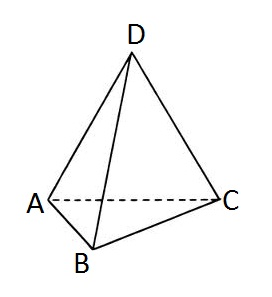\
В вершине тетраэдра D находится муравей. Муравей очень подвижный и не любит стоять на месте. В каждый момент времени он совершает один шаг от одной вершины к другой по некоторому ребру тетраэдра, оставаться на месте он не может.

От Вас в этой задаче требуется совсем немногое: нужно посчитать каким количеством способов муравей может прийти из исходной вершины D в себя ровно за n шагов. Другими словами, Вас просят узнать количество различных циклических путей длины n из вершины D в себя. Поскольку это количество может быть достаточно большим, ответ требуется посчитать по модулю \
1000000007 (109 + 7).

Входные данные
В первой строке записано единственное целое число n (1 ≤ n ≤ 107) — требуемая длина циклического пути.

Выходные данные\
Выведите единственное целое число — искомое количество способов по модулю \
1000000007 (109 + 7).

Примеры\
входные данные\
2\
выходные данные\
3\
входные данные\
4\
выходные данные\
21\
Примечание\
Искомые пути в первом примере:

D - A - D\
D - B - D\
D - C - D

In [110]:
def task_10(n):
    mod = 1000000007
    ans = pow(3, n, 4 * mod) #из каждой вершины можно перейти в 3 другие. Возведем 3**n по модулю 4 (верш) * mod
    if n % 2 == 0: #скорректируем ans в зависимости от четности n
        return((ans + 3) // 4) 
    else:
        return((ans - 3) // 4)

#Ввод данных с проверкой на дурака
t = input ('Введите единственное целое число n (1 ≤ n ≤ 10^7 - требуемую длину циклического пути ') #попытка ввода n
while True:    
    error_str = ok_input_int(t, 0, 1, 10000000, '=') #ok_input_int (t, p, left, right, fl) - проверка ввода
    if error_str != '-': #проверим, вернулась ли ошибка
        print(error_str) #если да, распечатаем её
        t = input ('Введите единственное целое число n (1 ≤ n ≤ 10^7 - требуемую длину циклического пути ') #попытка ввода заново
    else:
        break #в противном случае - ввод корректен
n = int(t)
print('Ответ: ', task_10(n))

Введите единственное целое число n (1 ≤ n ≤ 10^7 - требуемую длину циклического пути 4
Ответ:  21
